In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import display

pd.set_option('display.max_columns', None)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from ConstantClassifier import ConstantClassifier
import warnings
import classifier_utils
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [3]:
project_name = "freenet__fred"
project_name = project_name.replace('/','__')
df_test = pd.read_csv(f'../../data/projects/{project_name}-test.csv')

In [4]:
df_na = df_test[df_test.isna().any(axis=1)]
print(f'Total number of rows for project {project_name}: {len(df_test)}')
print(f'Percentage of rows with missing values: {len(df_na)}/{len(df_test)} ({(len(df_na) / len(df_test))*100:.2f}%)')

Total number of rows for project freenet__fred: 316
Percentage of rows with missing values: 63/316 (19.94%)


# Class distributions

### Normalized (%)

In [5]:
class_distribution_normalized = classifier_utils.get_project_class_distribution(df_test, project_name)

class_distribution_normalized

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,freenet__fred,43.08,17.79,20.16,7.91,0.4,10.28,0.4


### Count

In [6]:
class_distribution_count = classifier_utils.get_project_class_distribution(df_test, project_name, False)

class_distribution_count

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,freenet__fred,109,45,51,20,1,26,1


# Classifiers

In [7]:
# choose which algorithm to use
# algorithm = DecisionTreeClassifier(random_state=99)
algorithm = RandomForestClassifier(random_state=99, n_jobs=5, n_estimators=100, max_features=0.3, min_samples_leaf=1)
# algorithm = XGBRFClassifier(random_state=99)

In [8]:
result = classifier_utils.ProjectsResults(algorithm, [project_name], non_features_columns, training=False)

In [9]:
report = result.get_report_df()
report

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
0,freenet__fred,1268,1012,0.673,0.692,0.676,0.692,0.431,0.458


### Inspect project

In [10]:
sample_project = result.get_project(project_name)

,precision,recall,f1-score,support
Combination,0.581818,0.627451,0.603774,51.0000
ConcatenationV1V2,0.714286,0.500000,0.588235,20.0000
ConcatenationV2V1,0.000000,0.000000,0.000000,1.0000
Manual,0.428571,0.230769,0.300000,26.0000
None,0.000000,0.000000,0.000000,1.0000
Version 1,0.769231,0.825688,0.796460,109.0000
Version 2,0.698113,0.822222,0.755102,45.0000
accuracy,0.691700,0.691700,0.691700,0.6917
macro avg,0.456003,0.429447,0.434796,253.0000
weighted avg,0.673370,0.691700,0.676486,253.0000


None

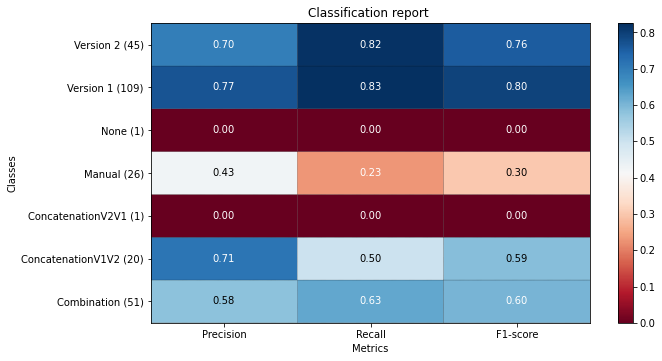

In [11]:
display(sample_project.get_scores_df())
display(classifier_utils.plot_classification_report(sample_project.scores))

### Confusion matrix

In [12]:
display(sample_project.get_confusion_matrix_df())

Columns = predicted label
Rows = true label


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Combination,32,1,0,4,0,10,4
ConcatenationV1V2,4,10,0,0,0,2,4
ConcatenationV2V1,1,0,0,0,0,0,0
Manual,8,0,0,6,0,10,2
None,0,0,0,0,0,1,0
Version 1,9,2,0,2,0,90,6
Version 2,1,1,0,2,0,4,37
